# Welcome to My Notebook
Hello recruiters, in this session, i will embark on Sales Store Analysis, focusing on five key approaches that hold the potential to drive impactful results to answer study case question. My primary objective with this analysis is **to enhance overall sales performance, elevate customer satisfaction, optimize marketing strategies, and improve the efficiency of shipping durations** as it's also aligned with study case objectives.

I obtained this dataset from Kaggle, and it is available at the following link: https://www.kaggle.com/datasets/bhanupratapbiswas/superstore-sales. Additionally, I created an online version of this analysis on Kaggle, which can be accessed at: https://www.kaggle.com/code/prastyasusanto/sales-store-analysis?scriptVersionId=139087051. The dataset contains information about superstore sales, and I conducted various analyses to gain insights into the sales trends, customer segmentation, regional performance, and shipping efficiency.
By thoroughly exploring each approach, we aim to gain a comprehensive understanding of our sales data, identify valuable patterns, and extract actionable insights that can propel our business to new heights. So, let's dive into this exploration.

In [15]:
# Import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data Cleaning and Preparation

In [16]:
# Read the data
df = pd.read_csv('C:/Users/Lenovo/Desktop/Data Analytics/Penugasan Site/superstore_final_dataset.csv', encoding='latin-1')

In [17]:
# Show first 10 th columns of the data
df.head(10)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680
5,6,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


In [18]:
# Check the shape of the data
df.shape

(9800, 18)

In [19]:
# Check the missing values
df.isna().sum()

Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64

It appears that **there are 11 missing values in the postal code field**. However, since the other columns are still present, they **may potentially provide valuable insights.** Therefore, for the time being, we will leave the missing values as they are.

In [20]:
# Change Sales to integer type
df['Sales'] = df['Sales'].astype(int)
# Convert Date column to Date-Time Format with the specified format
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d/%m/%Y')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], format='%d/%m/%Y')

# Sort the data by order_date
df.sort_values(by='Order_Date', inplace=True)


In [21]:
# See the data types
df.dtypes

Row_ID                    int64
Order_ID                 object
Order_Date       datetime64[ns]
Ship_Date        datetime64[ns]
Ship_Mode                object
Customer_ID              object
Customer_Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal_Code             float64
Region                   object
Product_ID               object
Category                 object
Sub_Category             object
Product_Name             object
Sales                     int32
dtype: object

# Exploratory Data Analysis and Data Visualization 
On this session, i'll be conducting exploratory data analysis and data visualization that are splitted into  5 segment:
1. **Sales Trends**: Tracking the total sales over time provides insights into the overall financial performance of the superstore. It helps identify peak seasons and periods of high or low sales.

2. **Sales by Product Category**: Analyzing sales by product category (e.g., electronics, apparel, home goods) helps understand which categories are driving revenue and which may require improvement.

3. **Sales by Region**: Superstores often have multiple locations. Analyzing sales by region helps identify the best-performing stores and areas for expansion or improvement.

4. **Sales by Customer Segments**: Understanding sales patterns among different customer segments can inform targeted marketing strategies and customer engagement.

5. **Sales by Shipping Class**: Different class for shipping maybe can lead to customer satisfaction and then lead to total sales overall. 

Based on those, we'll copy the original dataframe to create a new one so the original dataframe doesn't change. But, first of all, let us see the summary of our data

In [35]:
df['Sales'].describe()

count     9800.000000
mean       230.178571
std        626.628259
min          0.000000
25%         17.000000
50%         54.000000
75%        210.000000
max      22638.000000
Name: Sales, dtype: float64

The summary statistics provide valuable insights into the sales data. On average, each transaction yields a sales amount of 230.18, with a considerable standard deviation of 626.63, indicating a wide variation in sales values. The minimum sales value being 0 implies there might be some non-revenue transactions or instances with missing data. Additionally, the maximum sales amount reaching 22638 indicates the highest recorded sales in the dataset. The quartile values further illustrate the distribution, with 25% of transactions having sales below 17, 50% below 54, and 75% below 210. These statistics allow us **to understand the typical sales levels and identify potential outliers or areas for further investigation**.

# Summary of the Data
Let's explore only the Sales column, which is quite intriguing. The sales **values range from 0 to 22638**, indicating a **wide range of sales performance**.

The average sales amount **is approximately 230.18**, suggesting that there might be some significant transactions that contribute to the overall average.

The high **standard deviation of approximately 626.63** implies that the sales values have substantial variability. This suggests that some sales have a significant impact on the overall results.

Examining the percentile values, we can depict the distribution profile of sales. About 25% of sales are below 17, and 50% are below 54. Meanwhile, 75% of sales fall below 210. Consequently, it can be inferred that most of the sales data is concentrated on relatively low values, but there are also some outliers with very high sales figures.

From those analysis, let us see the sales distribution of all time.

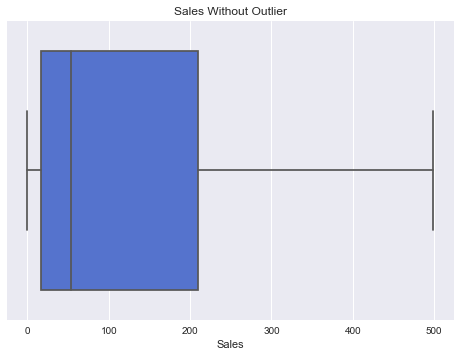

In [23]:
# Create box plot to see the distribution but
plt.style.use('seaborn')
sns.boxplot(x=df["Sales"], orient="h", showfliers=False, color='royalblue')
plt.title('Sales Without Outlier')
plt.show()

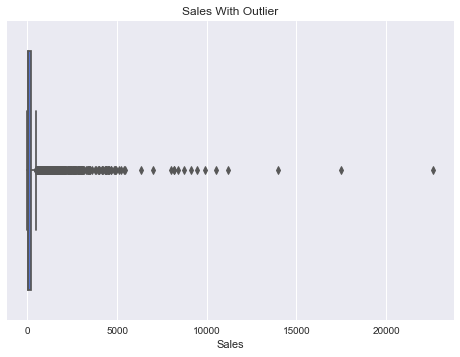

In [24]:
# Create box plot to see the distribution but
plt.style.use('seaborn')
sns.boxplot(x=df["Sales"], orient="h", showfliers=True, color='royalblue')
plt.title("Sales With Outlier")
plt.show()

As observed, the sales data is mostly concentrated **within the range of 0 to 500**, but there are outliers with values exceeding 500. Despite their presence, we have decided to keep the outliers for further analysis in order to obtain a comprehensive understanding of the overall data distribution. This approach aims to capture the full range of sales variability and potentially uncover valuable insights into exceptional cases that could significantly impact our analysis.

Now, let's move session 1, sales trends, but before that, let's copying our original dataframe!

In [25]:
# Copy the dataframe and create new column for trend analysis
df_1 = df.copy()
df_1['year_order_date'] = df_1['Order_Date'].dt.year
df_1['month_order_date'] = df_1['Order_Date'].dt.month
df_1['day_of_week_order_date'] = df_1['Order_Date'].dt.day_of_week
df_1['day_of_year_order_date'] = df_1['Order_Date'].dt.day_of_year
df_1['quarter_order_date'] = df_1['Order_Date'].dt.quarter
df_1['year_Ship_Date'] = df_1['Ship_Date'].dt.year
df_1['month_Ship_Date'] = df_1['Ship_Date'].dt.month
df_1['day_of_week_Ship_Date'] = df_1['Ship_Date'].dt.day_of_week
df_1['day_of_year_Ship_Date'] = df_1['Ship_Date'].dt.day_of_year
df_1['quarter_Ship_Date'] = df_1['Ship_Date'].dt.quarter

In [26]:
# Show the new dataframe
df_1.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,year_order_date,month_order_date,day_of_week_order_date,day_of_year_order_date,quarter_order_date,year_Ship_Date,month_Ship_Date,day_of_week_Ship_Date,day_of_year_Ship_Date,quarter_Ship_Date
7980,7981,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,2015,1,5,3,1,2015,1,2,7,1
741,742,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,2015,1,6,4,1,2015,1,3,8,1
740,741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,2015,1,6,4,1,2015,1,3,8,1
739,740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,2015,1,6,4,1,2015,1,3,8,1
1759,1760,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,2015,1,0,5,1,2015,1,0,12,1


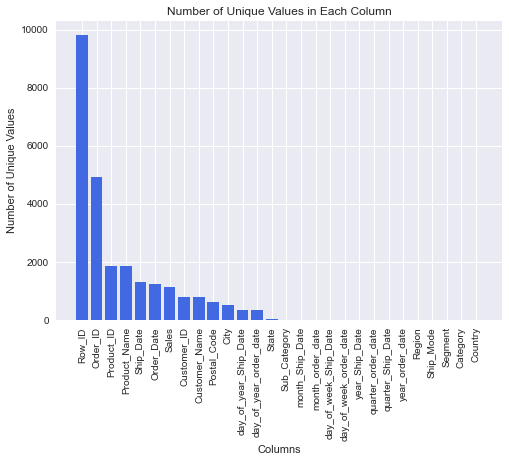

In [27]:
# Show the unique values for each columns
unique_values_count = df_1.nunique().sort_values(ascending=False)
plt.style.use('seaborn')
plt.bar(unique_values_count.index, unique_values_count.values, color='royalblue')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.title('Number of Unique Values in Each Column')
plt.xticks(rotation=90)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# 1. Sales Trends

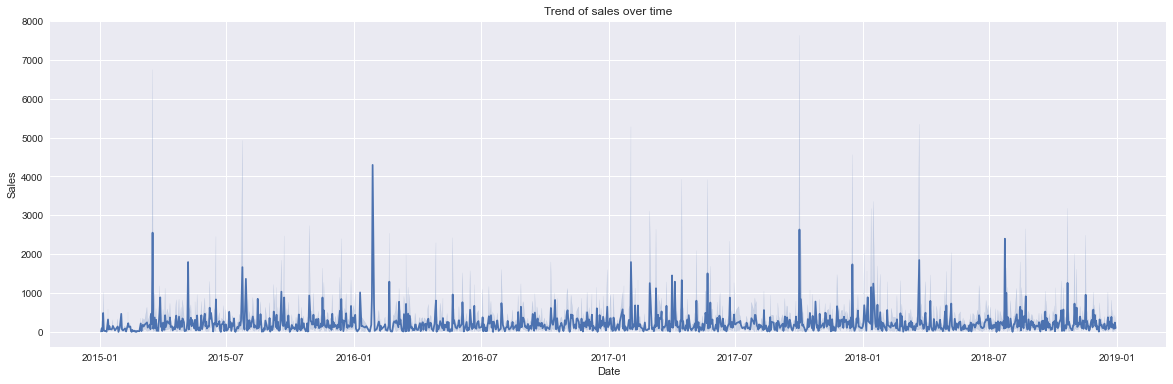

In [28]:
# Sales over time in general
plt.figure(figsize=(20,6))
sns.lineplot(data=df_1, x='Order_Date', y='Sales')
plt.title("Trend of sales over time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

It appears that the sales usually have its peak at the beginning of the year, such as at January 2016.
We'll also aggregate the quarter, day of week, and day of year for each year. 

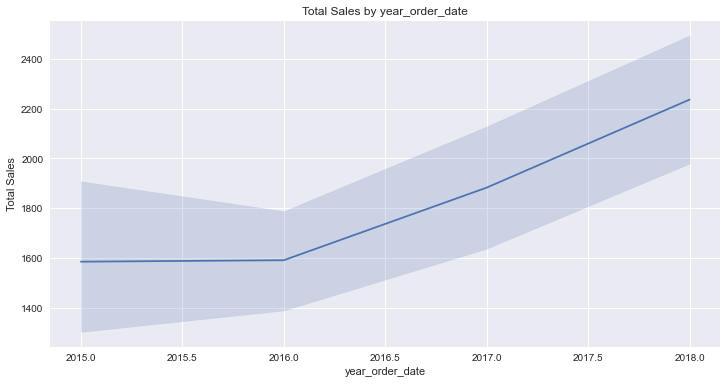

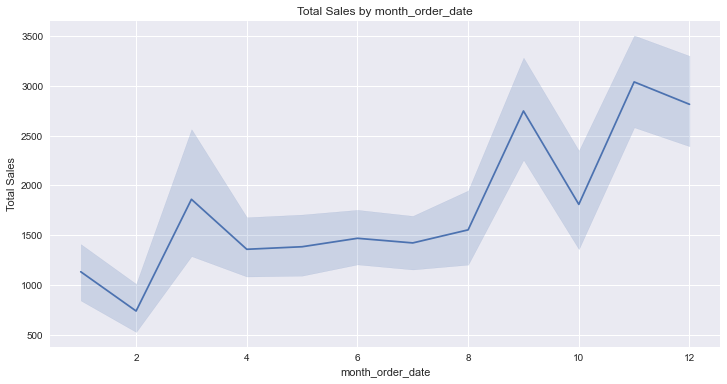

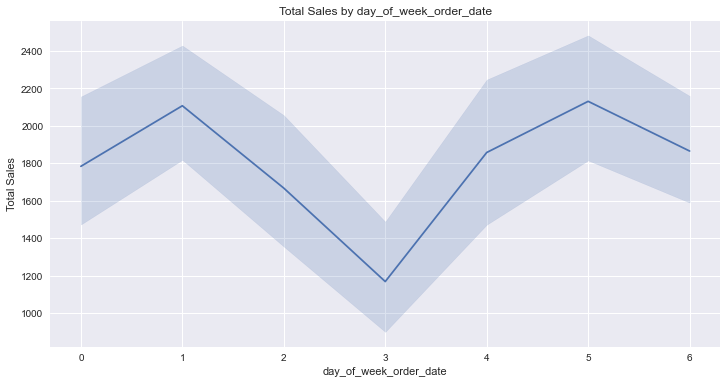

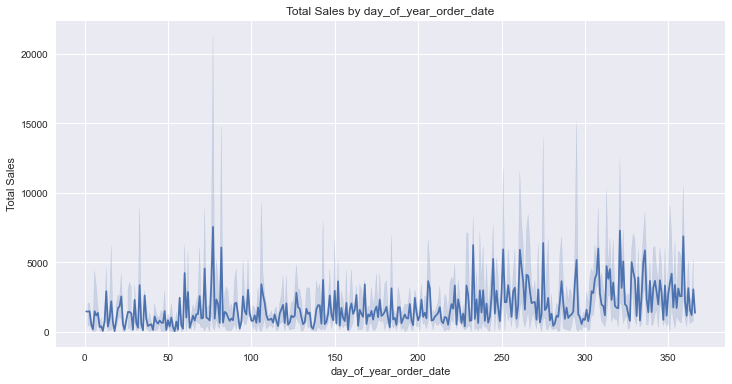

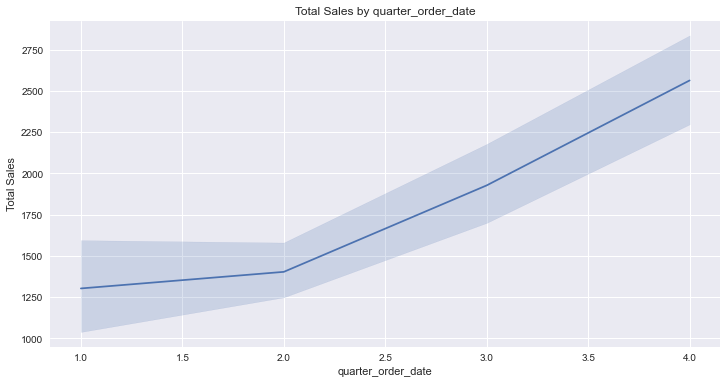

In [29]:
# Define the columns for grouping
group_cols = ['year_order_date', 'month_order_date', 'day_of_week_order_date',
              'day_of_year_order_date','quarter_order_date']

# Aggregate sales based on the specified group columns (groupby and sum)
aggregated_sales = df_1.groupby(group_cols)['Sales'].sum().reset_index()


# Visualization for each column in group_cols
for col in group_cols:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=col, y='Sales', data=aggregated_sales)
    plt.title("Total Sales by "+col)
    plt.xlabel(col)
    plt.ylabel("Total Sales")
    plt.show()

Based on the visualization above, we observed that **although sales typically reach their peak at the beginning of the year, the total amount of sales generally reaches its highest point at the end of the year**. This is evident from the monthly aggregate visualization, where sales peak in November and December, and it is further supported by the fact that the total amount of sales also reaches its peak in quarter 4.

From these visualization above, we also observed that  

Given these insights, it would be beneficial to conduct further investigation to understand the reasons behind the surge in sales at the end of the year. Possible factors contributing to this peak could be related to the holiday season, such as Christmas celebrations and gatherings with family and friends. By exploring these factors, we can gain valuable insights to inform strategic business decisions and plan targeted marketing efforts to capitalize on the end-of-year peak in sales.

As we know, our data have outliers, so let's move to trend analysis with outliers removed using IQR (Interquartile Range) method.

In [30]:
# Make a copy of the dataframe df_1
df_filter = df_1.copy()

# Calculate Q1 (25th percentile) and Q3 (75th percentile) of the "Sales" column
Q1 = df_filter['Sales'].quantile(0.25)
Q3 = df_filter['Sales'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the upper bound and lower bound for outlier detection
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filter the data by removing outliers based on IQR
df_outlier = df_filter[(df_filter['Sales'] < lower_bound) | (df_filter['Sales'] > upper_bound)]
df_filter = df_filter[(df_filter['Sales'] >= lower_bound) & (df_filter['Sales'] <= upper_bound)]


In [31]:
#statistical summary of sales data with outliers removed
df_filter['Sales'].describe()

count    8654.000000
mean       92.581927
std       114.586847
min         0.000000
25%        15.000000
50%        40.000000
75%       124.000000
max       499.000000
Name: Sales, dtype: float64

In [32]:
#statistical summary of sales data with outliers removed
df_outlier['Sales'].describe()

count     1146.000000
mean      1269.237347
std       1427.421268
min        500.000000
25%        636.000000
50%        869.500000
75%       1347.750000
max      22638.000000
Name: Sales, dtype: float64

As observed, the maximum of data without outlier (499) is significantly lower than the mean of outliers (1269), indicating there are time that the sales reach its peak. Hence, we'll visualize the outliers sales to know when those happens.

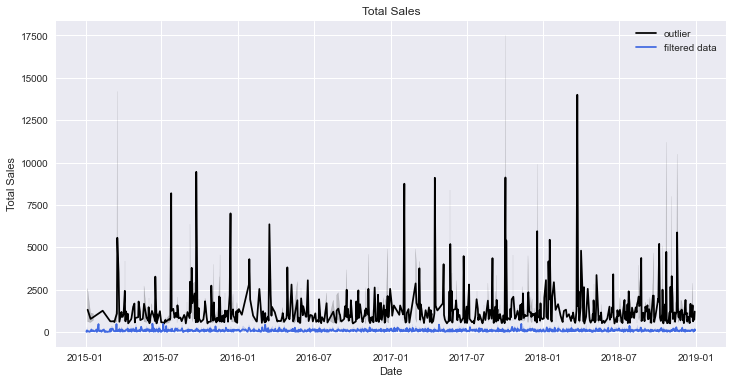

In [33]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order_Date', y='Sales', data=df_outlier, color='black', label='outlier')
sns.lineplot(x='Order_Date', y='Sales', data=df_filter, color='royalblue', label='filtered data')
plt.title("Total Sales")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.show()

As we can see, the data has its peak at the beginning of year per sales (not aggregatelly), specifically in quartal 1 per each year (January-April), but as we observed before, the total amount of sales still reach its peak at the end of year.
Based on that, maybe we can investigate why at the beginning and the end of the year, the sales reach its peak respectively.

# 2. Sales by Product Category
Now, let's shift our focus to product categories to identify which products contribute significantly to our sales and which ones may have lower performance.

In [ ]:
df_1.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'year_order_date', 'month_order_date',
       'day_of_week_order_date', 'day_of_year_order_date',
       'quarter_order_date', 'year_Ship_Date', 'month_Ship_Date',
       'day_of_week_Ship_Date', 'day_of_year_Ship_Date', 'quarter_Ship_Date'],
      dtype='object')

In [ ]:
# Get the amount of unique product
df_1['Product_Name'].nunique()

1849

In [ ]:
# Get the top ten all-time best-selling products
most_sell_all_time = df_1.groupby('Product_Name')['Sales'].sum().reset_index()
most_sell_all_time = most_sell_all_time.sort_values(by='Sales', ascending=True).tail(10).reset_index()

# Display the top ten best-selling products
print(most_sell_all_time)


   index                                       Product_Name  Sales
0    810        High Speed Automatic Electric Letter Opener  17029
1    681          GBC DocuBind P400 Electric Binding System  17962
2    784  HP Designjet T520 Inkjet Large Format Printer ...  18372
3    802               Hewlett Packard LaserJet 3310 Copier  18832
4    686   GBC Ibimaster 500 Manual ProClick Binding System  19019
5    684         GBC DocuBind TL300 Electric Binding System  19815
6    783       HON 5400 Series Task Chairs for Big and Tall  21866
7    443  Cisco TelePresence System EX90 Videoconferenci...  22638
8    648  Fellowes PB500 Electric Punch Plastic Comb Bin...  27446
9    403              Canon imageCLASS 2200 Advanced Copier  61595


<BarContainer object of 10 artists>

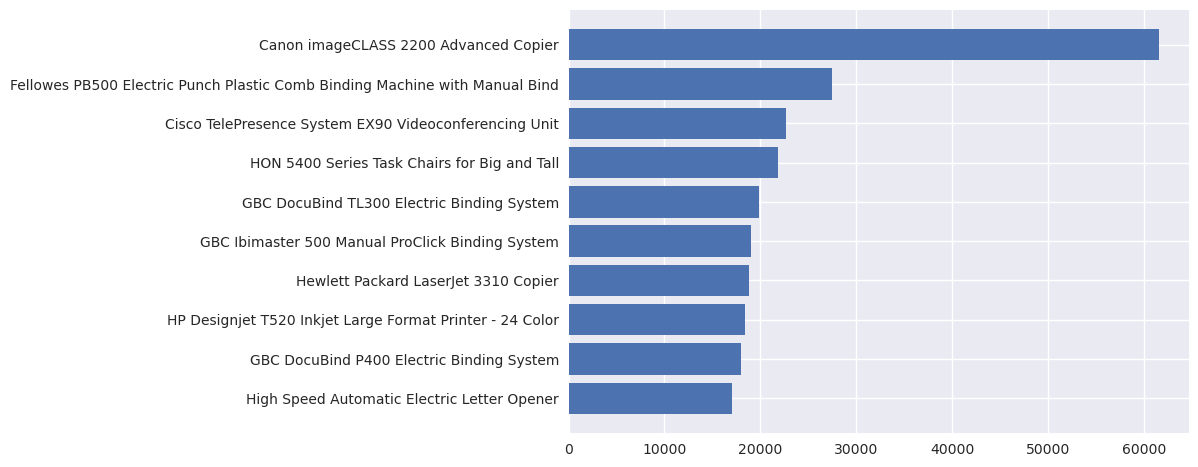

In [ ]:
# Visualize the most selling product
plt.barh(most_sell_all_time['Product_Name'], most_sell_all_time['Sales'])

From the above, we know  that Canon imageCLASS 2200 Advanced Copier is the most selling product of all time. But, does that product still the most selling product per year, quartar, or even month? Let's check it out but we restricted only to per year

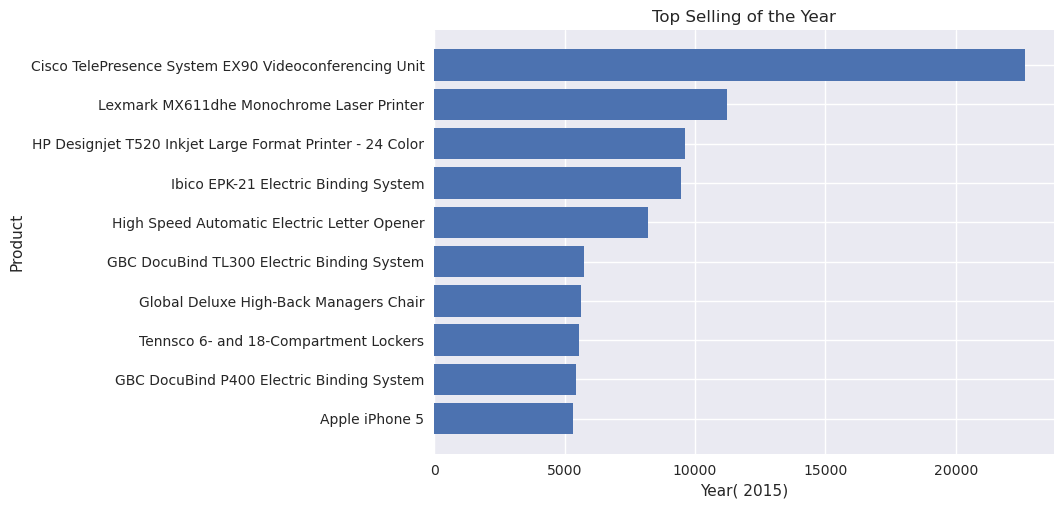

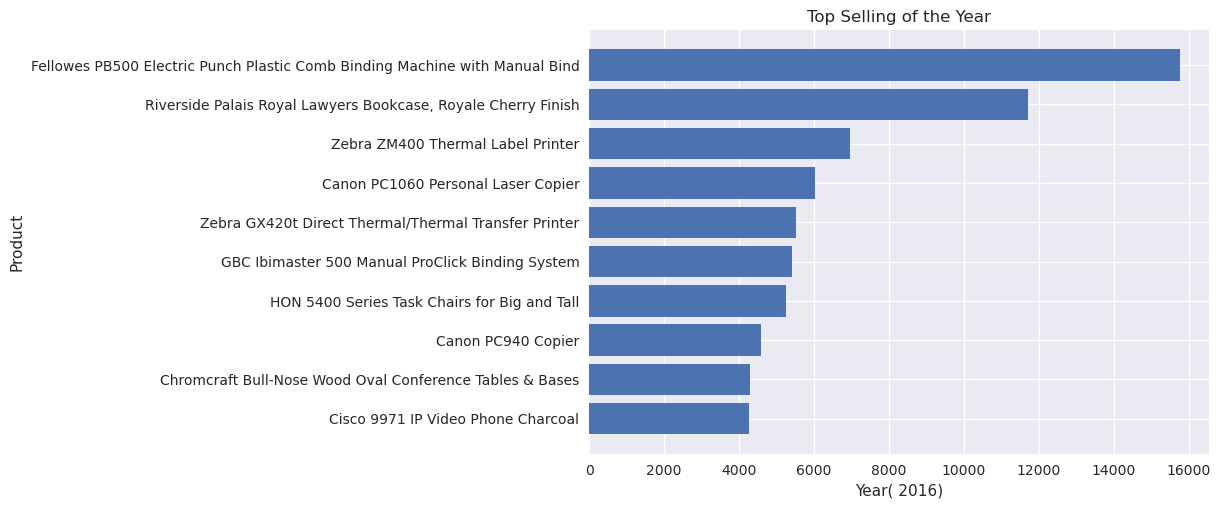

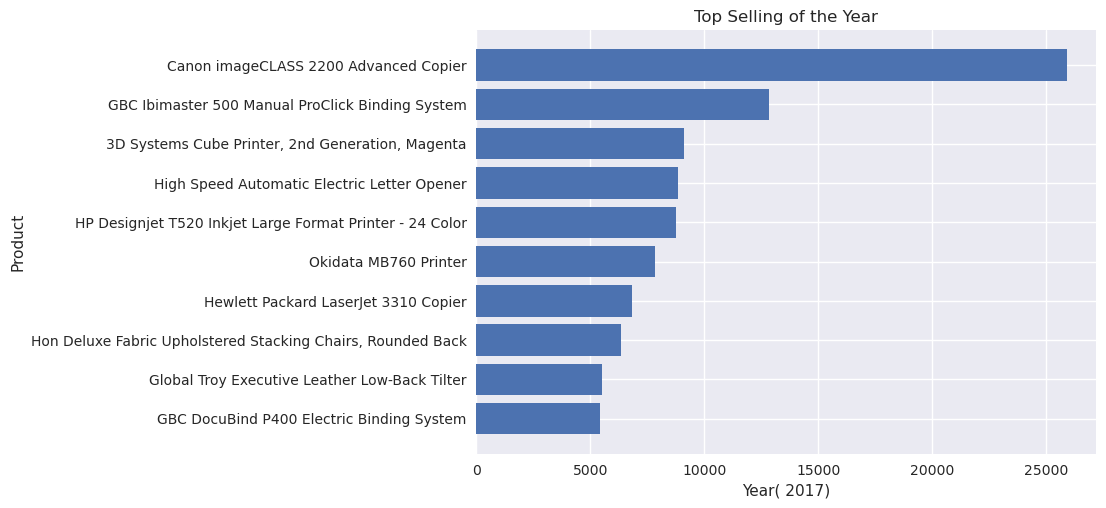

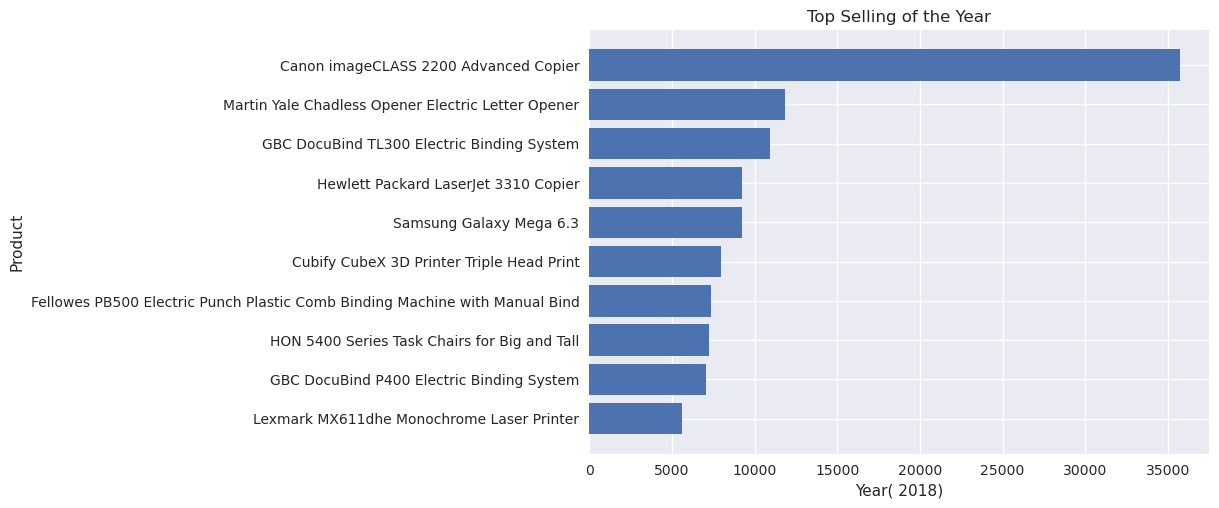

In [ ]:
# Filter top ten for each year
year = df_1['year_order_date'].unique()
sales_by_year = {}  # Create an empty dictionary to store the dataframes

for i in year:
    sales_i = df_1[df_1['year_order_date'] == i]
    sales_i = sales_i.groupby('Product_Name')['Sales'].sum().reset_index()
    
    # Store the dataframe in the dictionary with the key as the year
    sales_by_year[i] = sales_i
    sales_by_year[i].sort_values(by='Sales', ascending=True, inplace=True)
    sales_by_year[i] = sales_by_year[i].tail(10)

# visualize top ten per each year
for num in year:
    plt.style.use('seaborn')
    plt.barh(sales_by_year[num]['Product_Name'], sales_by_year[num]['Sales'])
    plt.title('Top Selling of the Year')
    plt.xlabel(f'Year( {num})')
    plt.ylabel('Product')
    plt.show()


Great! Now that we have identified the top-selling products per year and all-time, let's proceed to explore the products with the lowest sales.

In [ ]:
# Get the top ten all-time best-selling products
lowest_sell_all_time = df_1.groupby('Product_Name')['Sales'].sum().reset_index()
lowest_sell_all_time = lowest_sell_all_time.sort_values(by='Sales', ascending=False).tail(10).reset_index()

# Display the top ten best-selling products
print(lowest_sell_all_time)


   index                                       Product_Name  Sales
0     26                                  4009 Highlighters      8
1    781                                Grip Seal Envelopes      7
2   1507                         Stockwell Gold Paper Clips      7
3    252  Avery Hi-Liter Pen Style Six-Color Fluorescent...      7
4     96                  Acme Serrated Blade Letter Opener      7
5   1779                                         Xerox 1989      7
6    248  Avery Hi-Liter Comfort Grip Fluorescent Highli...      6
7   1792                                           Xerox 20      6
8    207                                            Avery 5      5
9    603  Eureka Disposable Bags for Sanitaire Vibra Gro...      1


<BarContainer object of 10 artists>

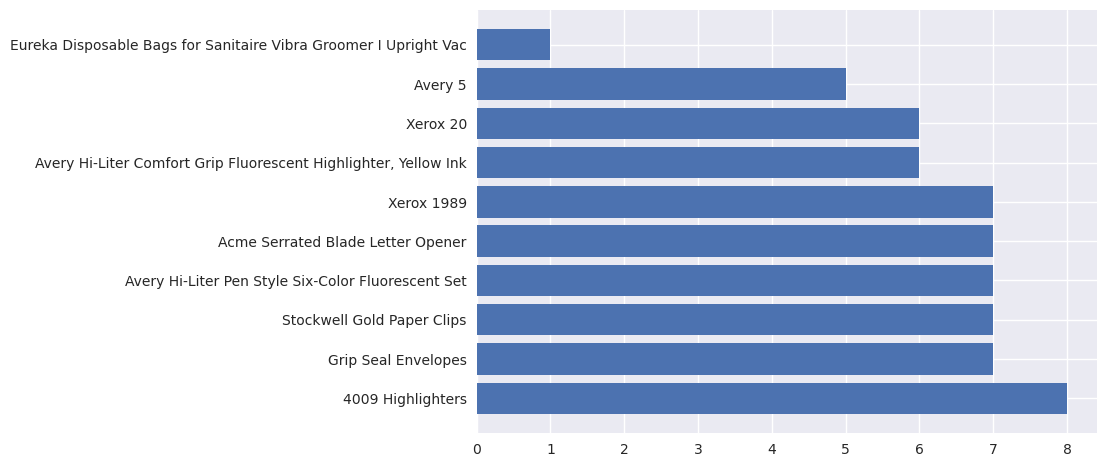

In [ ]:
# Visualize the lowest selling product
plt.barh(lowest_sell_all_time['Product_Name'], lowest_sell_all_time['Sales'])

Now, let's move to the lowest selling product per each year!

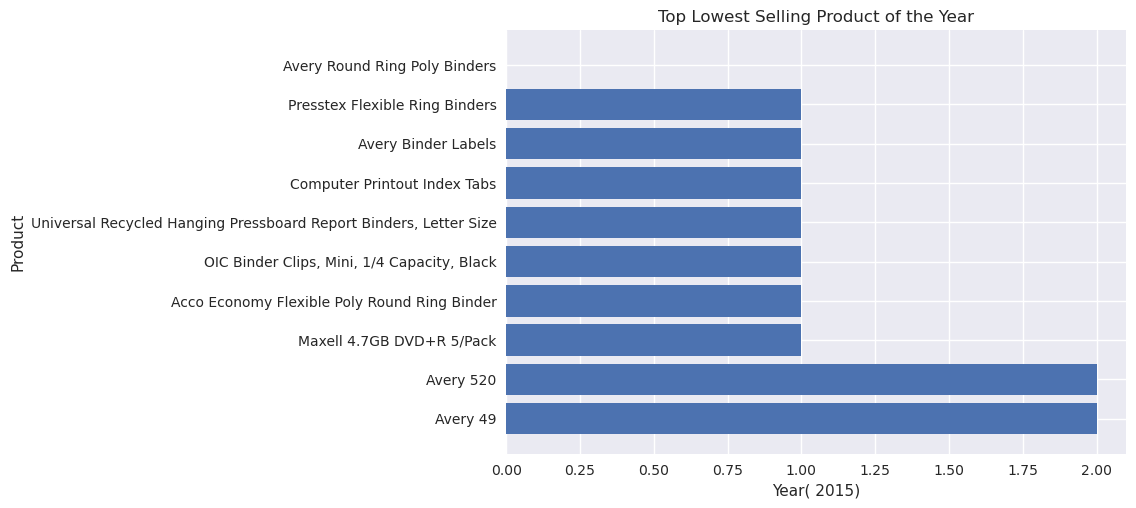

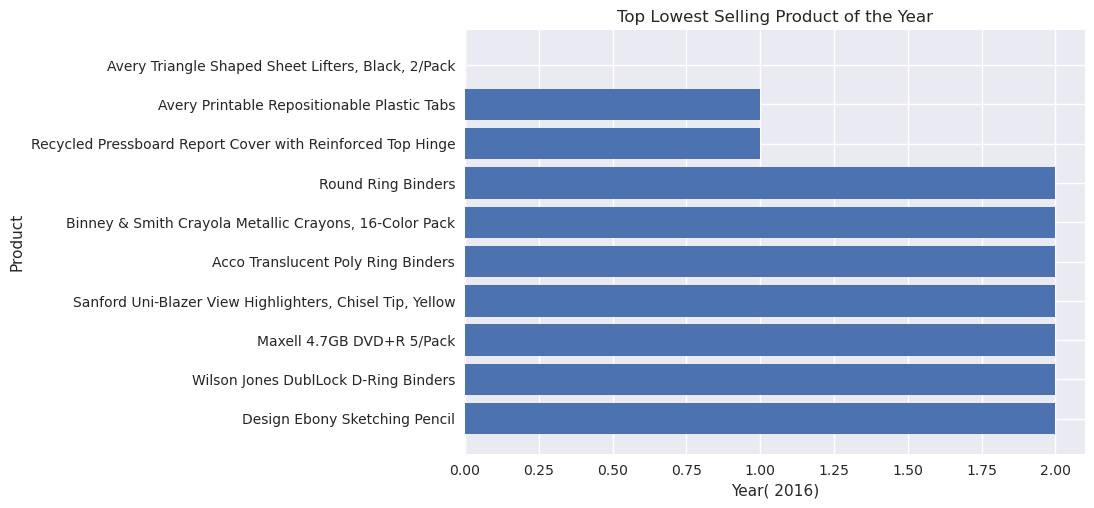

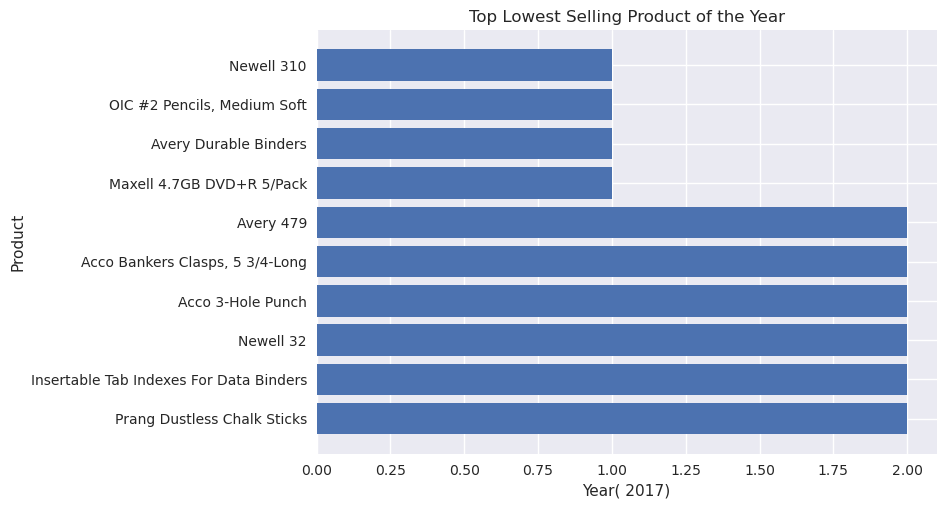

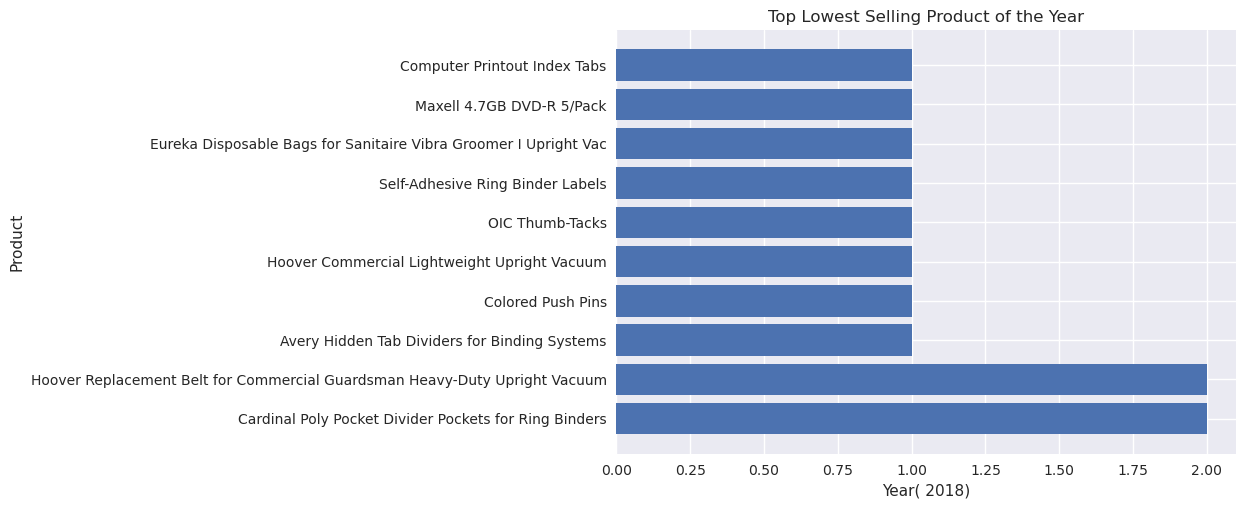

In [ ]:
# Filter top ten for each year
year = df_1['year_order_date'].unique()
sales_by_year_2 = {}  # Create an empty dictionary to store the dataframes

for i in year:
    sales_2_i = df_1[df_1['year_order_date'] == i]
    sales_2_i = sales_2_i.groupby('Product_Name')['Sales'].sum().reset_index()
    
    # Store the dataframe in the dictionary with the key as the year
    sales_by_year_2[i] = sales_2_i
    sales_by_year_2[i].sort_values(by='Sales', ascending=False, inplace=True)
    sales_by_year_2[i] = sales_by_year_2[i].tail(10)

# visualize top ten per each year
for num in year:
    plt.style.use('seaborn')
    plt.barh(sales_by_year_2[num]['Product_Name'], sales_by_year_2[num]['Sales'])
    plt.title('Top Lowest Selling Product of the Year')
    plt.xlabel(f'Year( {num})')
    plt.ylabel('Product')
    plt.show()


Based on these insights, marketers can consider retaining the top-selling products to capitalize on their success, focusing on strategies to increase the sales of the lowest-performing product, and exploring cross-selling methods to boost sales for both top and low-selling products.

# 3. Sales by Region

In [ ]:
# Get the unique amount of country, city, state, and region
df_1[['Country','City','State','Region']].nunique()

Country      1
City       529
State       49
Region       4
dtype: int64

So, obviously we have only one county, United States, 529 City, 49 State, and 4 Region.
Let's get the sales comparison for each of them.

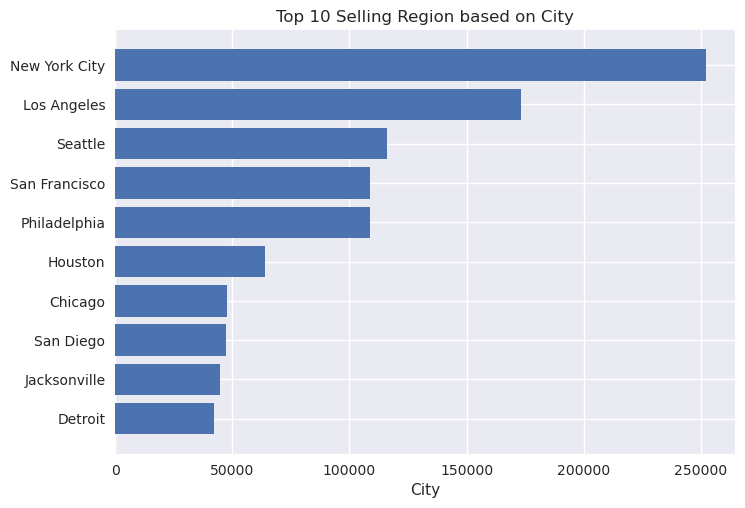

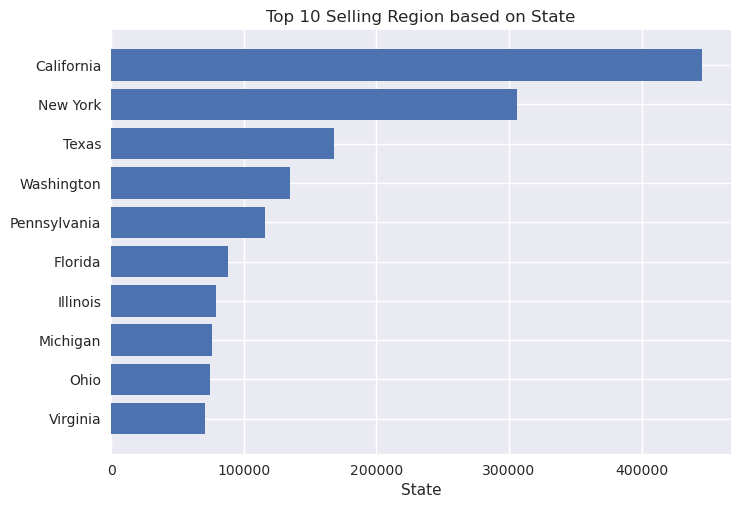

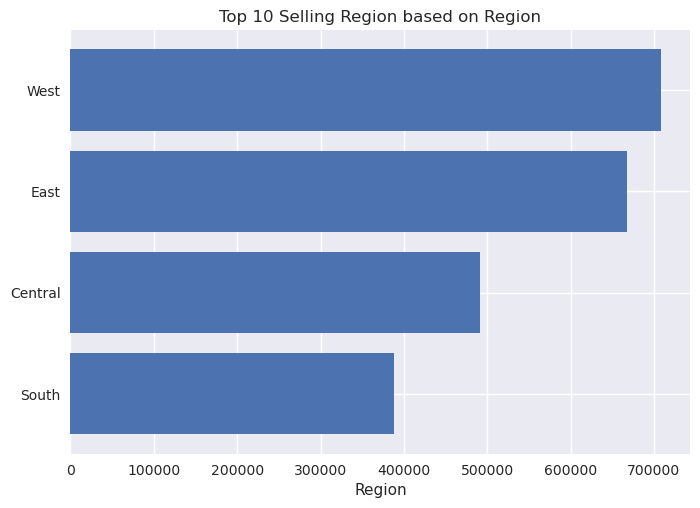

In [ ]:
region = ['City', 'State', 'Region']
df_region = {}

for i in region:
    region_i = df_1.groupby(i)['Sales'].sum().reset_index()
    
    # Store the dataframe in the dictionary with the key as the region name
    df_region[i] = region_i
    
    # Sort the dataframe in descending order based on sales
    df_region[i] = df_region[i].sort_values(by='Sales', ascending=True)
    
    # Get the top ten best-selling regions
    df_region[i] = df_region[i].tail(10)
for num in region:
    plt.style.use('seaborn')
    plt.barh(df_region[num][num], df_region[num]['Sales'])
    plt.title(f'Top 10 Selling Region based on {num}')
    plt.xlabel(num)
    plt.show()

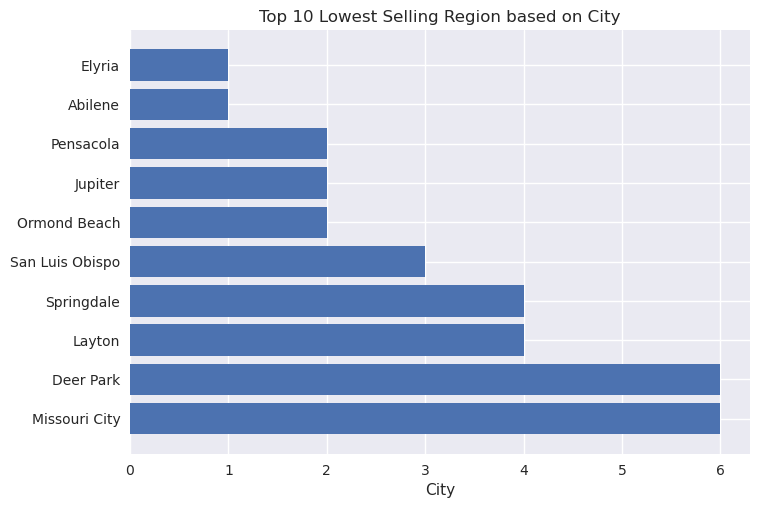

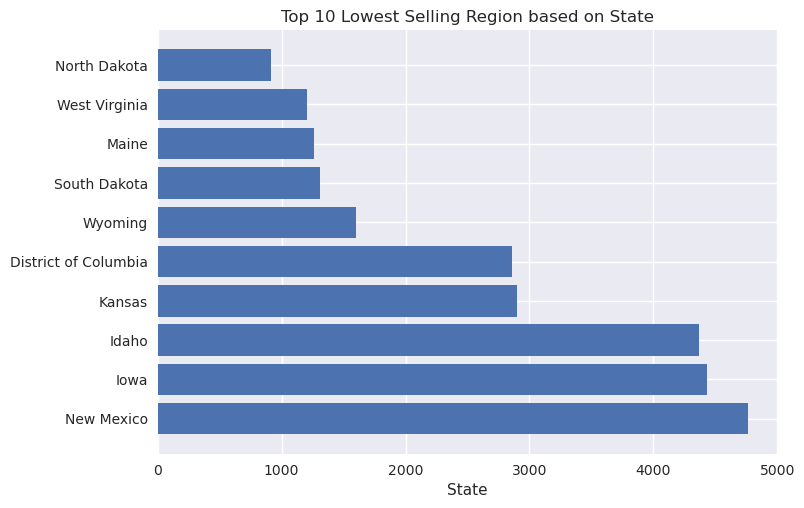

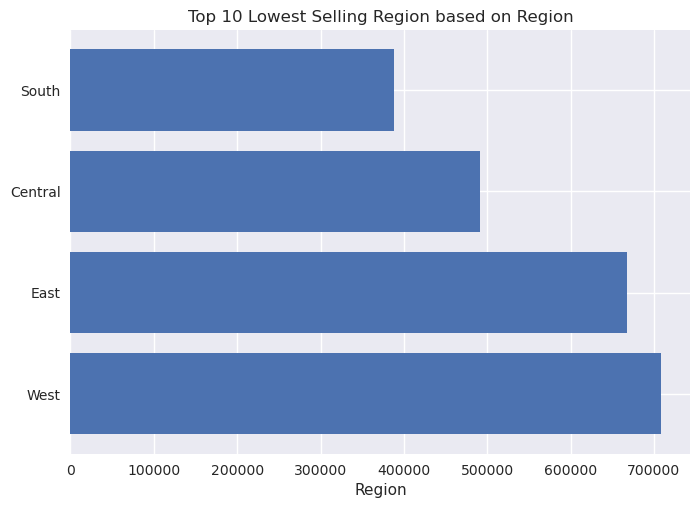

In [ ]:
df_region_lowest = {}

for i in region:
    region_2_i = df_1.groupby(i)['Sales'].sum().reset_index()
    
    # Store the dataframe in the dictionary with the key as the region name
    df_region_lowest[i] = region_2_i
    
    # Sort the dataframe in descending order based on sales
    df_region_lowest[i] = df_region_lowest[i].sort_values(by='Sales', ascending=False)
    
    # Get the top ten  lowest-selling regions
    df_region_lowest[i] = df_region_lowest[i].tail(10)
for num in region:
    plt.style.use('seaborn')
    plt.barh(df_region_lowest[num][num], df_region_lowest[num]['Sales'])
    plt.title(f'Top 10 Lowest Selling Region based on {num}')
    plt.xlabel(num)
    plt.show()

After identifying the most and least selling regions, a targeted investigation can uncover the reasons behind these sales patterns. Factors such as demographics, local economic conditions, marketing strategies, and store locations need to be analyzed to optimize sales strategies and improve performance in both regions.

Now, we move to know the sales trend over time and the sales density per month for each region by column 'region'.

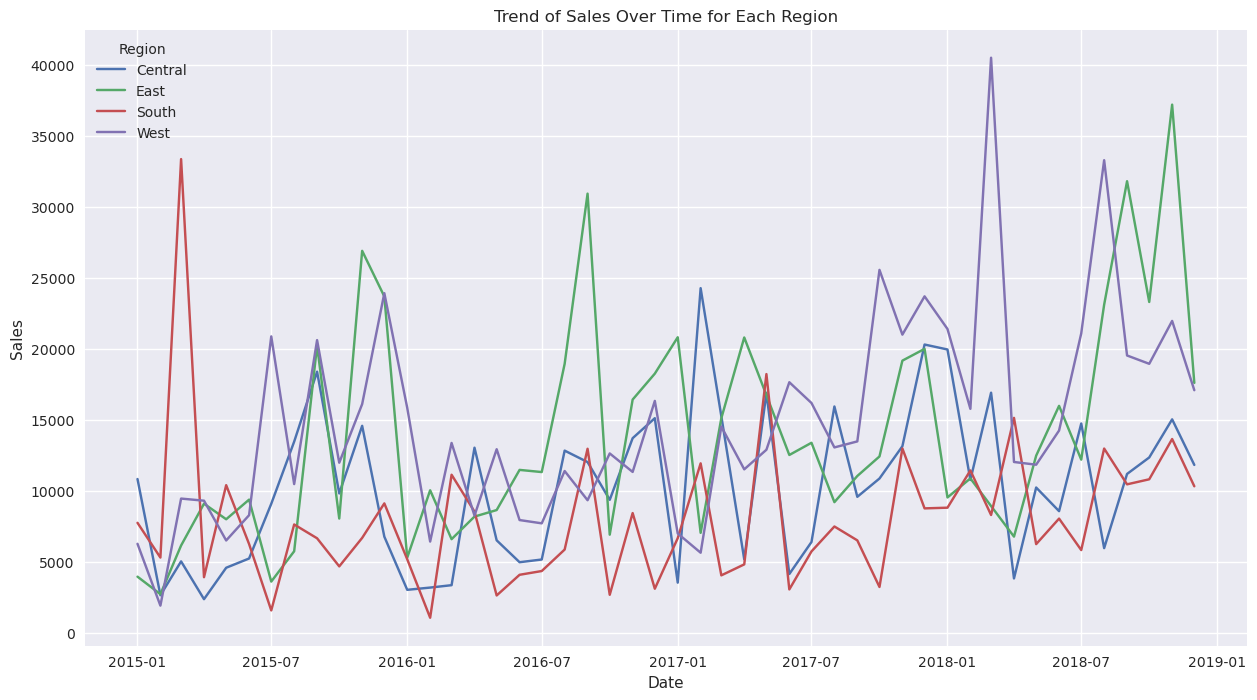

In [ ]:
# Aggregate sales on a monthly basis for each region
monthly_sales_region = df.groupby([df['Order_Date'].dt.to_period('M'), 'Region']).sum()['Sales'].reset_index()
monthly_sales_region['Order_Date'] = monthly_sales_region['Order_Date'].dt.to_timestamp()

# Create a line plot for each region
plt.figure(figsize=(15, 8))
sns.lineplot(data=monthly_sales_region, x='Order_Date', y='Sales', hue='Region')
plt.title('Trend of Sales Over Time for Each Region')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

<Axes: xlabel='Sales', ylabel='Density'>

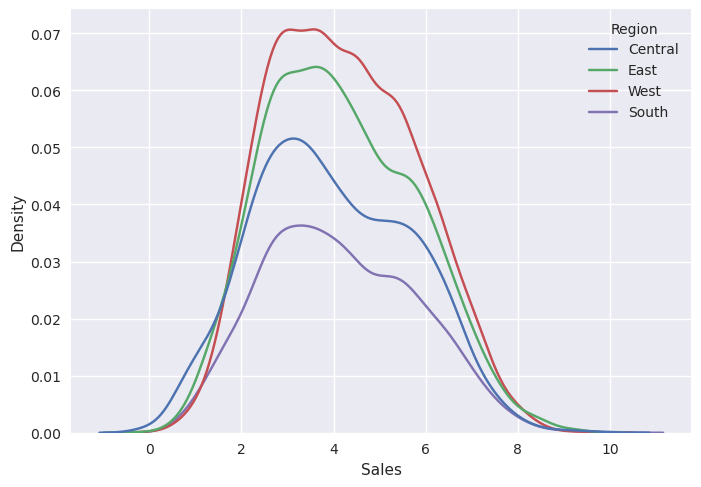

In [ ]:
sales_region = ['Sales', 'Region']
df_sales_region = df[sales_region]


df_sales_region['Sales'] = np.log1p(df_sales_region['Sales'])


sns.kdeplot(data=df_sales_region, x='Sales', hue='Region')

So, we can see the selling differences between region, but is that statistically significant?
Let's check it out using Kruskal-Wallis test

In [ ]:
sales_region = ['Sales', 'Region']
df_sales_region_2 = df_1[sales_region]



In [ ]:
# import kruskal-wallis test
from scipy.stats import kruskal

# Perform Kruskal-Wallis test
result = kruskal(*[group['Sales'] for name, group in df_sales_region_2.groupby('Region')])

# Print Kruskal-Wallis test results
print("Kruskal-Wallis test results:")
print("Statistic =", result.statistic)
print("P-value =", result.pvalue)

if result.pvalue < 0.05:
    print("There is a significant difference in total sales between each region.")
else:
    print("There is no significant difference in total sales between each region.")


Kruskal-Wallis test results:
Statistic = 25.12660655791269
P-value = 1.4527384553816842e-05
There is a significant difference in total sales between each region.


So, there is a significant difference in total sales between each region, hence it can be considerable insight for later action, such as build new store on that region, and etc

# 4. Customer Segmentation
Our data already have customer segmentation, so we can directly analyze with that.


In [ ]:
# Get distinct segmentation and amount of them
print(df_1['Segment'].unique()), print(df_1['Segment'].nunique())

['Consumer' 'Home Office' 'Corporate']
3


(None, None)

In [ ]:
# Total Sales is grouped by segmentation
segmentation = df_1.groupby('Segment')['Sales'].sum().reset_index()
segmentation.rename(columns={'Sales': 'Total Sales'}, inplace=True)
segmentation

,Segment,Total Sales
0,Consumer,1145045
1,Corporate,686748
2,Home Office,423957


<BarContainer object of 3 artists>

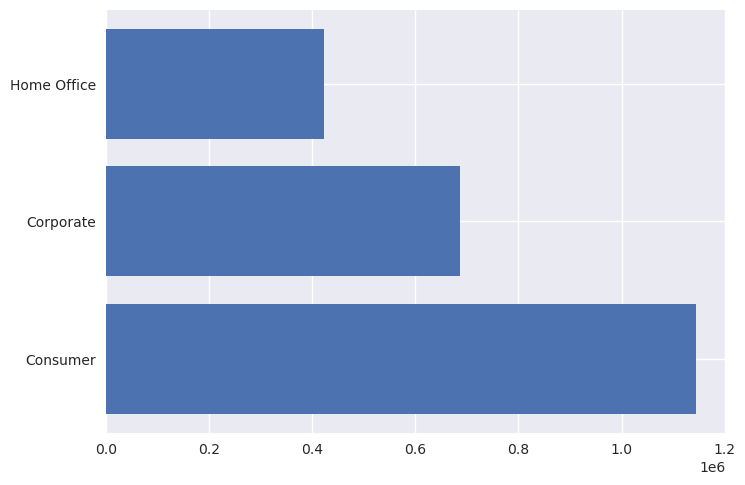

In [ ]:
# Visualize it
plt.barh(segmentation['Segment'], segmentation['Total Sales'])

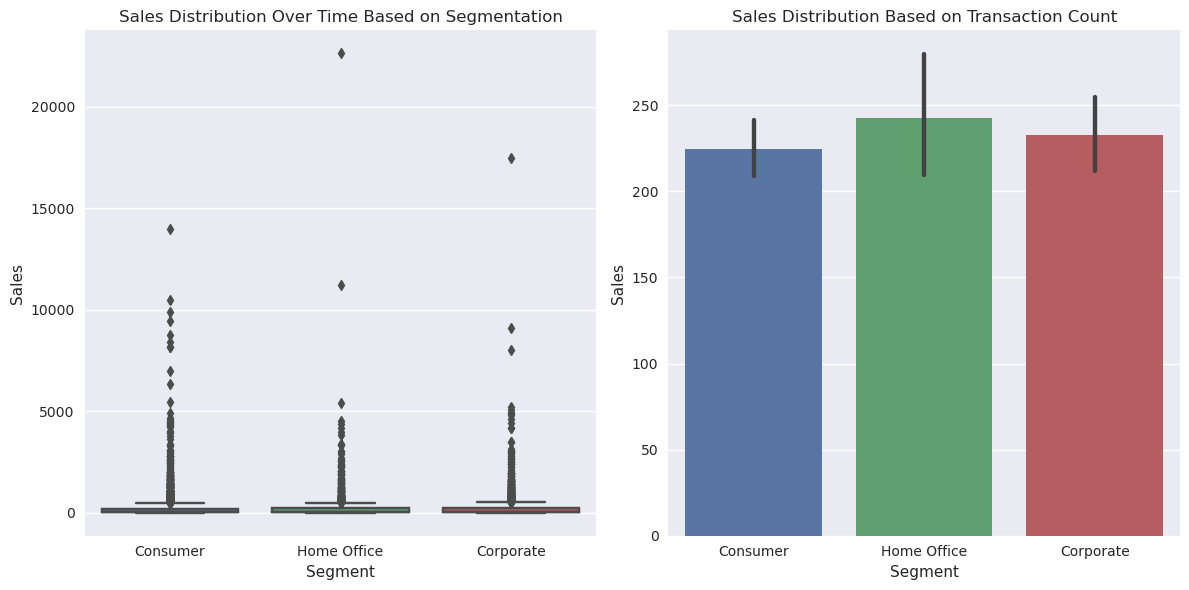

In [ ]:
# Create sales distribution
sales_segments = ['Sales', 'Segment']
df_sales_segments = df[sales_segments]
df_3 = df[sales_segments].copy()

df_sales_segments['Sales'] = np.log1p(df_sales_segments['Sales'])

# Subplot creation
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First graph (boxplot)
axs[0].set_title('Sales Distribution Over Time Based on Segmentation')
sns.boxplot(data=df_3, x='Segment', y='Sales', ax=axs[0])

# Second graph (barplot)
axs[1].set_title("Sales Distribution Based on Transaction Count")
sns.barplot(data=df_3, x='Segment', y='Sales', ax=axs[1])

plt.tight_layout()
plt.show()


Let's determine if the differences in total sales between each segmentation are statistically significant using Kruskal-Wallis test again.

In [ ]:
# Perform Kruskal-Wallis test
result_2 = kruskal(*[group['Sales'] for name, group in df_3.groupby('Segment')])

# Print Kruskal-Wallis test results
print("Kruskal-Wallis test results:")
print("Statistic =", result_2.statistic)
print("P-value =", result_2.pvalue)

if result.pvalue < 0.05:
    print("There is a significant difference in total sales between each segment.")
else:
    print("There is no significant difference in total sales between each segment.")


Kruskal-Wallis test results:
Statistic = 0.4323041322834929
P-value = 0.805612786130339
There is a significant difference in total sales between each segment.


Although it's intuitive that the personal segment has higher total sales compared to company and home office, conducting the statistical test will confirm our assumption. This will help us investigate the reasons behind the sales differences between segments, such as product availability or targeted marketing strategies, and make informed decisions to optimize sales performance accordingly.

Finally, let's see the total sales trend for each segment monthly!

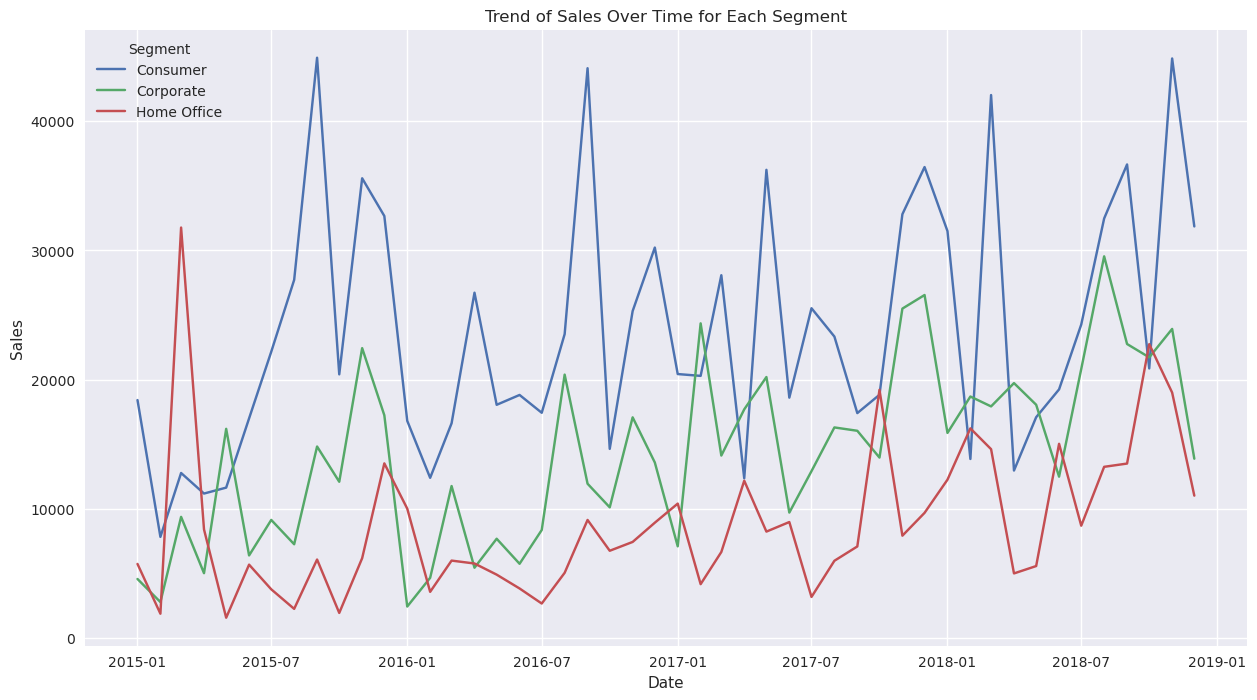

In [ ]:
# Add date column for segment sales data
df_3['Order_Date'] = df_1['Order_Date']

# Aggregate sales on a monthly basis for each segment
segment_sales_2 = df_1.groupby([df['Order_Date'].dt.to_period('M'), 'Segment']).sum()['Sales'].reset_index()
segment_sales_2['Order_Date'] = segment_sales_2['Order_Date'].dt.to_timestamp()
# Create a line plot for each segment
plt.figure(figsize=(15, 8))
sns.lineplot(data=segment_sales_2, x='Order_Date', y='Sales', hue='Segment')
plt.title('Trend of Sales Over Time for Each Segment')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

As observed, the total sales amount **remains stable over the years**, with o**ccasional spikes at certain moments**. Interestingly, when **one segment experiences an increase in sales, we notice a corresponding increase in another segmen**t, which prompts the question of whether there is a positive correlation between them.

To investigate this correlation, we should make sure that all of them have equal amount of transaction in our data, so let's check it out first.

In [ ]:
# Count the occurrences of each segment
segment_counts = df_3['Segment'].value_counts()

# Print the count for each segment
print(segment_counts)

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64


Unfortunately, since the amount of transaction between them is not equal, we can't compute the correlation test between them.

# 5. Shipping Class/Mode

In [ ]:
# Change order and ship date to datetime
df_1['Order_Date'] = pd.to_datetime(df_1['Order_Date'])
df_1['Ship_Date'] = pd.to_datetime(df_1['Ship_Date'])
df_1['Duration'] = (df_1['Ship_Date']-df_1['Order_Date']).dt.days

In [ ]:
# Create new dataframe for ship date
df_shipping = df_1[['Order_Date','Ship_Date','Ship_Mode','Duration','Sales']]
df_shipping

,Order_Date,Ship_Date,Ship_Mode,Duration,Sales
540,2015-01-02,2015-03-02,First Class,59,468
5713,2015-01-03,2015-05-03,Standard Class,120,5
157,2015-01-03,2015-06-03,Second Class,151,457
6548,2015-01-03,2015-05-03,Standard Class,120,17
7949,2015-01-03,2015-05-03,Standard Class,120,63
...,...,...,...,...,...
908,2018-12-30,2019-03-01,Standard Class,61,52
645,2018-12-30,2019-05-01,Standard Class,122,209
907,2018-12-30,2019-03-01,Standard Class,61,90
906,2018-12-30,2019-03-01,Standard Class,61,323


Let's calculate the average duration for each ship mode, so we can see what's the difference service between them in term of duration.

In [ ]:
# Create average duration for each ship mode
average_ship = df_shipping.groupby('Ship_Mode')['Duration'].mean().reset_index()
average_ship

,Ship_Mode,Duration
0,First Class,6.594937
1,Same Day,0.565056
2,Second Class,4.704522
3,Standard Class,12.157535


Surprisingly that second class duration is slightly faster than first class duration. Based on this, we can investigate why that happen, because sometimes it can leads to decrease customer satisfaction. Alternatively, we can also offer another benefit besides duration to keep customer satisfaction. Let's see the total sales for each ship mode.

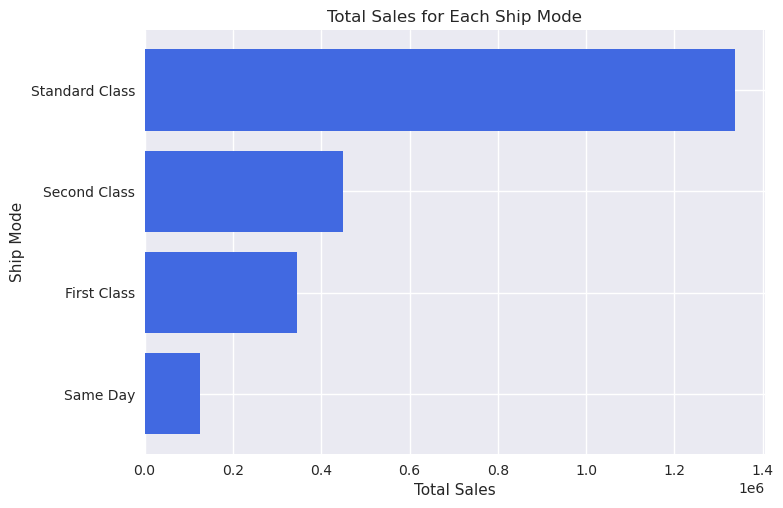

In [ ]:
# Count total sales for each ship mode
shipping_total = df_shipping.groupby('Ship_Mode')['Sales'].sum().reset_index()
shipping_total = shipping_total.sort_values(by='Sales', ascending=True)

# Visualize it
plt.style.use('seaborn')
plt.barh(shipping_total['Ship_Mode'], shipping_total['Sales'], color='royalblue')
plt.xlabel('Total Sales')
plt.ylabel('Ship Mode')
plt.title('Total Sales for Each Ship Mode')
plt.show()


The result is as intuitively as it see, but there's huge gap between them, let's check it out again using Kruskal-Wallis test.

In [ ]:
# Perform Kruskal-Wallis test
result_3 = kruskal(*[group['Sales'] for name, group in shipping_total.groupby('Ship_Mode')])

# Print Kruskal-Wallis test results
print("Kruskal-Wallis test results:")
print("Statistic =", result_3.statistic)
print("P-value =", result_3.pvalue)

if result.pvalue < 0.05:
    print("There is a significant difference in total sales between each shipping mode.")
else:
    print("There is no significant difference in total sales between each shipping mode.")


Kruskal-Wallis test results:
Statistic = 3.0
P-value = 0.3916251762710877
There is a significant difference in total sales between each shipping mode.


There is a significant difference between the shipping modes in terms of total sales. By investigating the cause of this difference, we hope to encourage more customers to choose same day or first-class shipping, thereby increasing revenue.

# Conclusion and Business Recommendations:
Based on our comprehensive analysis, we have derived several key conclusions that can provide valuable insights for our business strategy:

1. Sales Trend: Our sales trend shows a consistent peak at the end and beginning of the year. To leverage this seasonal pattern, we recommend running targeted promotions and discounts during these transition periods to further boost sales and capitalize on customer demand.

2. Product Analysis: The top ten best-selling products have remained consistent over time, as have the lowest-selling products. To optimize our product portfolio, we suggest maintaining the best-selling products and conducting further investigation into the underperforming ones. We can explore potential improvements or consider replacing them with more popular alternatives.

3. Regional Variation: We observed significant differences in sales across regions. To fully understand the underlying reasons, we propose conducting in-depth investigations to identify factors that may be influencing these disparities. Tailoring marketing strategies and product offerings based on regional preferences can lead to increased sales and customer satisfaction.

4. Segmentation Impact: Segmenting customers based on their classification (Company, Customer, Home Office) revealed distinct sales patterns. To cater to the unique needs of each segment, we recommend tailoring marketing campaigns and product promotions to maximize customer engagement and retention.

5. Shipping Mode Optimization: Our analysis shows that standard class shipping is the most popular choice, with surprising findings that the second class has a faster average shipping time than first class. To improve customer satisfaction and revenue, we should focus on enhancing the speed and reliability of first-class and same-day shipping options.

By implementing these recommendations, hopefully we can strengthen our market position, increase customer satisfaction, and drive sustainable growth for our business. Continuous monitoring and evaluation of the results will be crucial to ensure the effectiveness of our strategies and make timely adjustments when necessary.